In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/arab-league/Arab_League(2000-2024).csv


In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px 

**1.Import CSV file**

In [3]:
df = pd.read_csv('/kaggle/input/arab-league/Arab_League(2000-2024).csv')
df.head()

,Name,Region,GENC,Year,Population,Male Population,Female Population,Annual Growth Rate %,Population Density (People per Sq. Km.),Sex Ratio at Birth,"Life Expectancy at Birth, Males","Life Expectancy at Birth, Females","Infant Mortality Rate, Males","Infant Mortality Rate, Females"
0,-> 2000,NaN,NaN,NaN,--,--,--,--,--,--,--,--,--,--
1,Arab League,"2000,Arab League",NaN,2000.0,"276,653,975",--,--,--,20.7,--,--,--,--,--
2,Algeria,"2000,Arab League,Algeria",DZ,2000.0,"30,634,947","15,479,993","15,154,954",1.4,12.9,1.05,70.9,72.9,41.8,35.1
3,Bahrain,"2000,Arab League,Bahrain",BH,2000.0,"654,862","373,897","280,965",2.24,861.7,1.03,73.5,76.6,18,14.4
4,Comoros,"2000,Arab League,Comoros",KM,2000.0,"546,058","266,482","279,576",2.61,244.3,1.03,58.2,61.4,97.9,76


In [4]:
df.shape

(625, 14)

In [5]:
df.info

<bound method DataFrame.info of                      Name                                 Region GENC    Year  \
0                 -> 2000                                    NaN  NaN     NaN   
1             Arab League                       2000,Arab League  NaN  2000.0   
2                 Algeria               2000,Arab League,Algeria   DZ  2000.0   
3                 Bahrain               2000,Arab League,Bahrain   BH  2000.0   
4                 Comoros               2000,Arab League,Comoros   KM  2000.0   
..                    ...                                    ...  ...     ...   
620                 Syria                 2024,Arab League,Syria   SY  2024.0   
621               Tunisia               2024,Arab League,Tunisia   TN  2024.0   
622  United Arab Emirates  2024,Arab League,United Arab Emirates   AE  2024.0   
623             West Bank             2024,Arab League,West Bank   XW  2024.0   
624                 Yemen                 2024,Arab League,Yemen   YE  2024.0

**2.Remove the 'Year'row, 'Arab League' row and 'Region' column and convert the 'Year' column into (int) type**

In [6]:
df = df[~df['Name'].str.contains('-> 20')] # to filter rows that start with 20
df_copy =df.copy()
df_copy = df_copy.drop(['Region'], axis=1)
df_copy =df_copy[~df_copy['Name'].str.contains('Arab League')]
df_copy['Year'] = df_copy['Year'].astype(int)
df_copy

,Name,GENC,Year,Population,Male Population,Female Population,Annual Growth Rate %,Population Density (People per Sq. Km.),Sex Ratio at Birth,"Life Expectancy at Birth, Males","Life Expectancy at Birth, Females","Infant Mortality Rate, Males","Infant Mortality Rate, Females"
2,Algeria,DZ,2000,"30,634,947","15,479,993","15,154,954",1.4,12.9,1.05,70.9,72.9,41.8,35.1
3,Bahrain,BH,2000,"654,862","373,897","280,965",2.24,861.7,1.03,73.5,76.6,18,14.4
4,Comoros,KM,2000,"546,058","266,482","279,576",2.61,244.3,1.03,58.2,61.4,97.9,76
5,Djibouti,DJ,2000,"666,653","314,994","351,659",3.37,28.8,1.03,55.9,60.4,79.4,61.3
6,Egypt,EG,2000,"65,549,954","33,513,850","32,036,104",2.08,65.8,1.06,66.4,68.9,39.4,35.6
...,...,...,...,...,...,...,...,...,...,...,...,...,...
620,Syria,SY,2024,"23,865,423","11,981,578","11,883,845",1.67,128.4,1.06,73.4,76.4,16.6,13.5
621,Tunisia,TN,2024,"12,048,847","5,972,242","6,076,605",0.58,77.6,1.06,75.7,79.1,12.7,9.8
622,United Arab Emirates,AE,2024,"10,032,213","6,824,131","3,208,082",0.6,120,1.06,78.6,81.4,5.5,4.4
623,West Bank,XW,2024,"3,243,369","1,648,450","1,594,919",2.07,575.1,1.06,74.4,78.8,17.5,12.6


**3. Remove the ',' from the 'Population', 'Male Population' and 'Female Population'**

In [7]:
df_copy['Population'] =df_copy['Population'].str.replace(',', '')
df_copy['Female Population'] =df_copy['Female Population'].str.replace(',', '')
df_copy['Male Population'] =df_copy['Male Population'].str.replace(',', '')
df_copy

,Name,GENC,Year,Population,Male Population,Female Population,Annual Growth Rate %,Population Density (People per Sq. Km.),Sex Ratio at Birth,"Life Expectancy at Birth, Males","Life Expectancy at Birth, Females","Infant Mortality Rate, Males","Infant Mortality Rate, Females"
2,Algeria,DZ,2000,30634947,15479993,15154954,1.4,12.9,1.05,70.9,72.9,41.8,35.1
3,Bahrain,BH,2000,654862,373897,280965,2.24,861.7,1.03,73.5,76.6,18,14.4
4,Comoros,KM,2000,546058,266482,279576,2.61,244.3,1.03,58.2,61.4,97.9,76
5,Djibouti,DJ,2000,666653,314994,351659,3.37,28.8,1.03,55.9,60.4,79.4,61.3
6,Egypt,EG,2000,65549954,33513850,32036104,2.08,65.8,1.06,66.4,68.9,39.4,35.6
...,...,...,...,...,...,...,...,...,...,...,...,...,...
620,Syria,SY,2024,23865423,11981578,11883845,1.67,128.4,1.06,73.4,76.4,16.6,13.5
621,Tunisia,TN,2024,12048847,5972242,6076605,0.58,77.6,1.06,75.7,79.1,12.7,9.8
622,United Arab Emirates,AE,2024,10032213,6824131,3208082,0.6,120,1.06,78.6,81.4,5.5,4.4
623,West Bank,XW,2024,3243369,1648450,1594919,2.07,575.1,1.06,74.4,78.8,17.5,12.6


**4. Display Country Name and the Annual Growth Rate % for the year of 2001**

In [8]:
df_copy.loc[df_copy['Year'] == 2001, ['Name','Year','Annual Growth Rate %']]

,Name,Year,Annual Growth Rate %
27,Algeria,2001,1.45
28,Bahrain,2001,2.95
29,Comoros,2001,2.66
30,Djibouti,2001,3.55
31,Egypt,2001,2.08
32,Gaza Strip,2001,2.98
33,Iraq,2001,3
34,Jordan,2001,2.32
35,Kuwait,2001,2.72
36,Lebanon,2001,1.55


***5. Divide the data so that each country has its own data ***

In [9]:

countries = ['Algeria','Bahrain','Comoros','Djibouti','Egypt','Gaza Strip',
             'Iraq','Jordan','Kuwait','Lebanon','Libya','Mauritania','Morocco',
             'Oman','Qatar','Saudi Arabia','Somalia','Sudan','Syria','Tunisia',
             'United Arab Emirates','West Bank','Yemen']
selected_data = df_copy[df_copy['Name'].isin(countries)][['Name','Year','Population','Male Population','Female Population','Annual Growth Rate %',
                                                          'Population Density (People per Sq. Km.)','Sex Ratio at Birth','Life Expectancy at Birth, Males',
                                                          'Life Expectancy at Birth, Females','Infant Mortality Rate, Males','Infant Mortality Rate, Females']]
data_Algeria = selected_data[selected_data['Name']=='Algeria']
data_Bahrain = selected_data[selected_data['Name']=='Bahrain']
data_Comoros = selected_data[selected_data['Name']=='Comoros']
data_Djibouti = selected_data[selected_data['Name']=='Djibouti']
data_Egypt = selected_data[selected_data['Name']=='Egypt']
data_Gaza_Strip = selected_data[selected_data['Name']=='Gaza Strip']
data_Iraq = selected_data[selected_data['Name']=='Iraq']
data_Jordan = selected_data[selected_data['Name']=='Jordan']
data_Kuwait = selected_data[selected_data['Name']=='Kuwait']
data_Lebanon = selected_data[selected_data['Name']=='Lebanon']
data_Libya = selected_data[selected_data['Name']=='Libya']
data_Mauritania = selected_data[selected_data['Name']=='Mauritania']
data_Morocco = selected_data[selected_data['Name']=='Morocco']
data_Oman = selected_data[selected_data['Name']=='Oman']
data_Qatar = selected_data[selected_data['Name']=='Qatar']
data_Saudi_Arabia = selected_data[selected_data['Name']=='Saudi Arabia']
data_Somalia = selected_data[selected_data['Name']=='Somalia']
data_Sudan = selected_data[selected_data['Name']=='Sudan']
data_Syria = selected_data[selected_data['Name']=='Syria']
data_Tunisia = selected_data[selected_data['Name']=='Tunisia']
data_United_Arab_Emirates = selected_data[selected_data['Name']=='United Arab Emirates']
data_West_Bank = selected_data[selected_data['Name']=='West Bank']
data_Yemen = selected_data[selected_data['Name']=='Yemen']



In [10]:
data_Somalia.head(5)

,Name,Year,Population,Male Population,Female Population,Annual Growth Rate %,Population Density (People per Sq. Km.),Sex Ratio at Birth,"Life Expectancy at Birth, Males","Life Expectancy at Birth, Females","Infant Mortality Rate, Males","Infant Mortality Rate, Females"
18,Somalia,2000,7500559,3755865,3744694,3.58,12,1.03,44.6,47.8,135.5,115.8
43,Somalia,2001,7765975,3885182,3880793,3.38,12.4,1.03,45.1,48.3,133.4,113.7
68,Somalia,2002,8017560,4008770,4008790,3.01,12.8,1.03,45.5,48.8,131.4,111.6
93,Somalia,2003,8273586,4134677,4138909,3.28,13.2,1.03,45.9,49.3,129.4,109.5
118,Somalia,2004,8539890,4265503,4274387,3.06,13.6,1.03,46.3,49.8,127.4,107.5


In [11]:
data_Saudi_Arabia.head(5)

,Name,Year,Population,Male Population,Female Population,Annual Growth Rate %,Population Density (People per Sq. Km.),Sex Ratio at Birth,"Life Expectancy at Birth, Males","Life Expectancy at Birth, Females","Infant Mortality Rate, Males","Infant Mortality Rate, Females"
17,Saudi Arabia,2000,21361821,11976885,9384936,2.38,9.9,1.05,70.8,73.5,22.9,19.8
42,Saudi Arabia,2001,21861634,12212224,9649410,2.25,10.2,1.05,71,73.7,22.2,19.2
67,Saudi Arabia,2002,22342525,12435198,9907327,2.11,10.4,1.05,71.2,73.8,21.6,18.6
92,Saudi Arabia,2003,22801189,12644223,10156966,1.96,10.6,1.05,71.4,74,21,18.1
117,Saudi Arabia,2004,23234774,12838039,10396735,1.81,10.8,1.05,71.6,74.2,20.4,17.6


In [12]:
data_United_Arab_Emirates.head(5)

,Name,Year,Population,Male Population,Female Population,Annual Growth Rate %,Population Density (People per Sq. Km.),Sex Ratio at Birth,"Life Expectancy at Birth, Males","Life Expectancy at Birth, Females","Infant Mortality Rate, Males","Infant Mortality Rate, Females"
22,United Arab Emirates,2000,3230742,2197119,1033623,5.64,38.6,1.03,74.7,77.5,11.4,9.1
47,United Arab Emirates,2001,3402348,2319672,1082676,4.74,40.7,1.03,74.8,77.6,11,8.8
72,United Arab Emirates,2002,3555027,2426155,1128872,4.06,42.5,1.03,75,77.8,10.6,8.5
97,United Arab Emirates,2003,3693043,2520035,1173008,3.57,44.2,1.03,75.1,77.9,10.2,8.2
122,United Arab Emirates,2004,3819555,2603968,1215587,3.17,45.7,1.03,75.3,78,9.9,8


***6. Compare the male and female population for Somalia between the years of 2000 and 2024 ***

In [13]:
data_Somalia[['Name','Year','Male Population','Female Population']]

,Name,Year,Male Population,Female Population
18,Somalia,2000,3755865,3744694
43,Somalia,2001,3885182,3880793
68,Somalia,2002,4008770,4008790
93,Somalia,2003,4134677,4138909
118,Somalia,2004,4265503,4274387
143,Somalia,2005,4391906,4403370
168,Somalia,2006,4503319,4512619
193,Somalia,2007,4619995,4628019
218,Somalia,2008,4731366,4736170
243,Somalia,2009,4817426,4811756


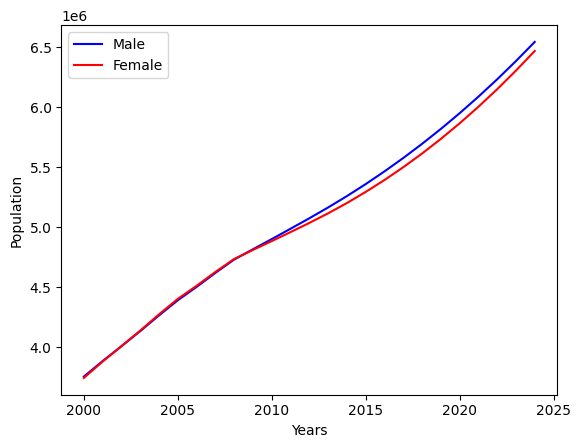

In [14]:


data_Somalia.loc[:,'Male Population'] = pd.to_numeric(data_Somalia['Male Population'], errors='coerce')
data_Somalia.loc[:,'Female Population'] = pd.to_numeric(data_Somalia['Female Population'], errors='coerce')

ax = plt.gca()

data_Somalia.plot(x='Year', y='Male Population', linestyle='-', color='b', label='Male', ax=ax)
data_Somalia.plot(x='Year', y='Female Population', linestyle='-', color='r', label='Female', ax=ax)

plt.xlabel('Years')
plt.ylabel('Population')
plt.legend()
plt.show()


**7. Compare Male and Female Population for every country between the year of 2000 and 2024**

/tmp/ipykernel_18/3099275531.py:16: UserWarning: FixedFormatter should only be used together with FixedLocator
  axs[i].set_xticklabels(axs[i].get_xticklabels(), rotation=45)
/tmp/ipykernel_18/3099275531.py:16: UserWarning: FixedFormatter should only be used together with FixedLocator
  axs[i].set_xticklabels(axs[i].get_xticklabels(), rotation=45)
/tmp/ipykernel_18/3099275531.py:16: UserWarning: FixedFormatter should only be used together with FixedLocator
  axs[i].set_xticklabels(axs[i].get_xticklabels(), rotation=45)
/tmp/ipykernel_18/3099275531.py:16: UserWarning: FixedFormatter should only be used together with FixedLocator
  axs[i].set_xticklabels(axs[i].get_xticklabels(), rotation=45)
/tmp/ipykernel_18/3099275531.py:16: UserWarning: FixedFormatter should only be used together with FixedLocator
  axs[i].set_xticklabels(axs[i].get_xticklabels(), rotation=45)
/tmp/ipykernel_18/3099275531.py:16: UserWarning: FixedFormatter should only be used together with FixedLocator
  axs[i].set_x

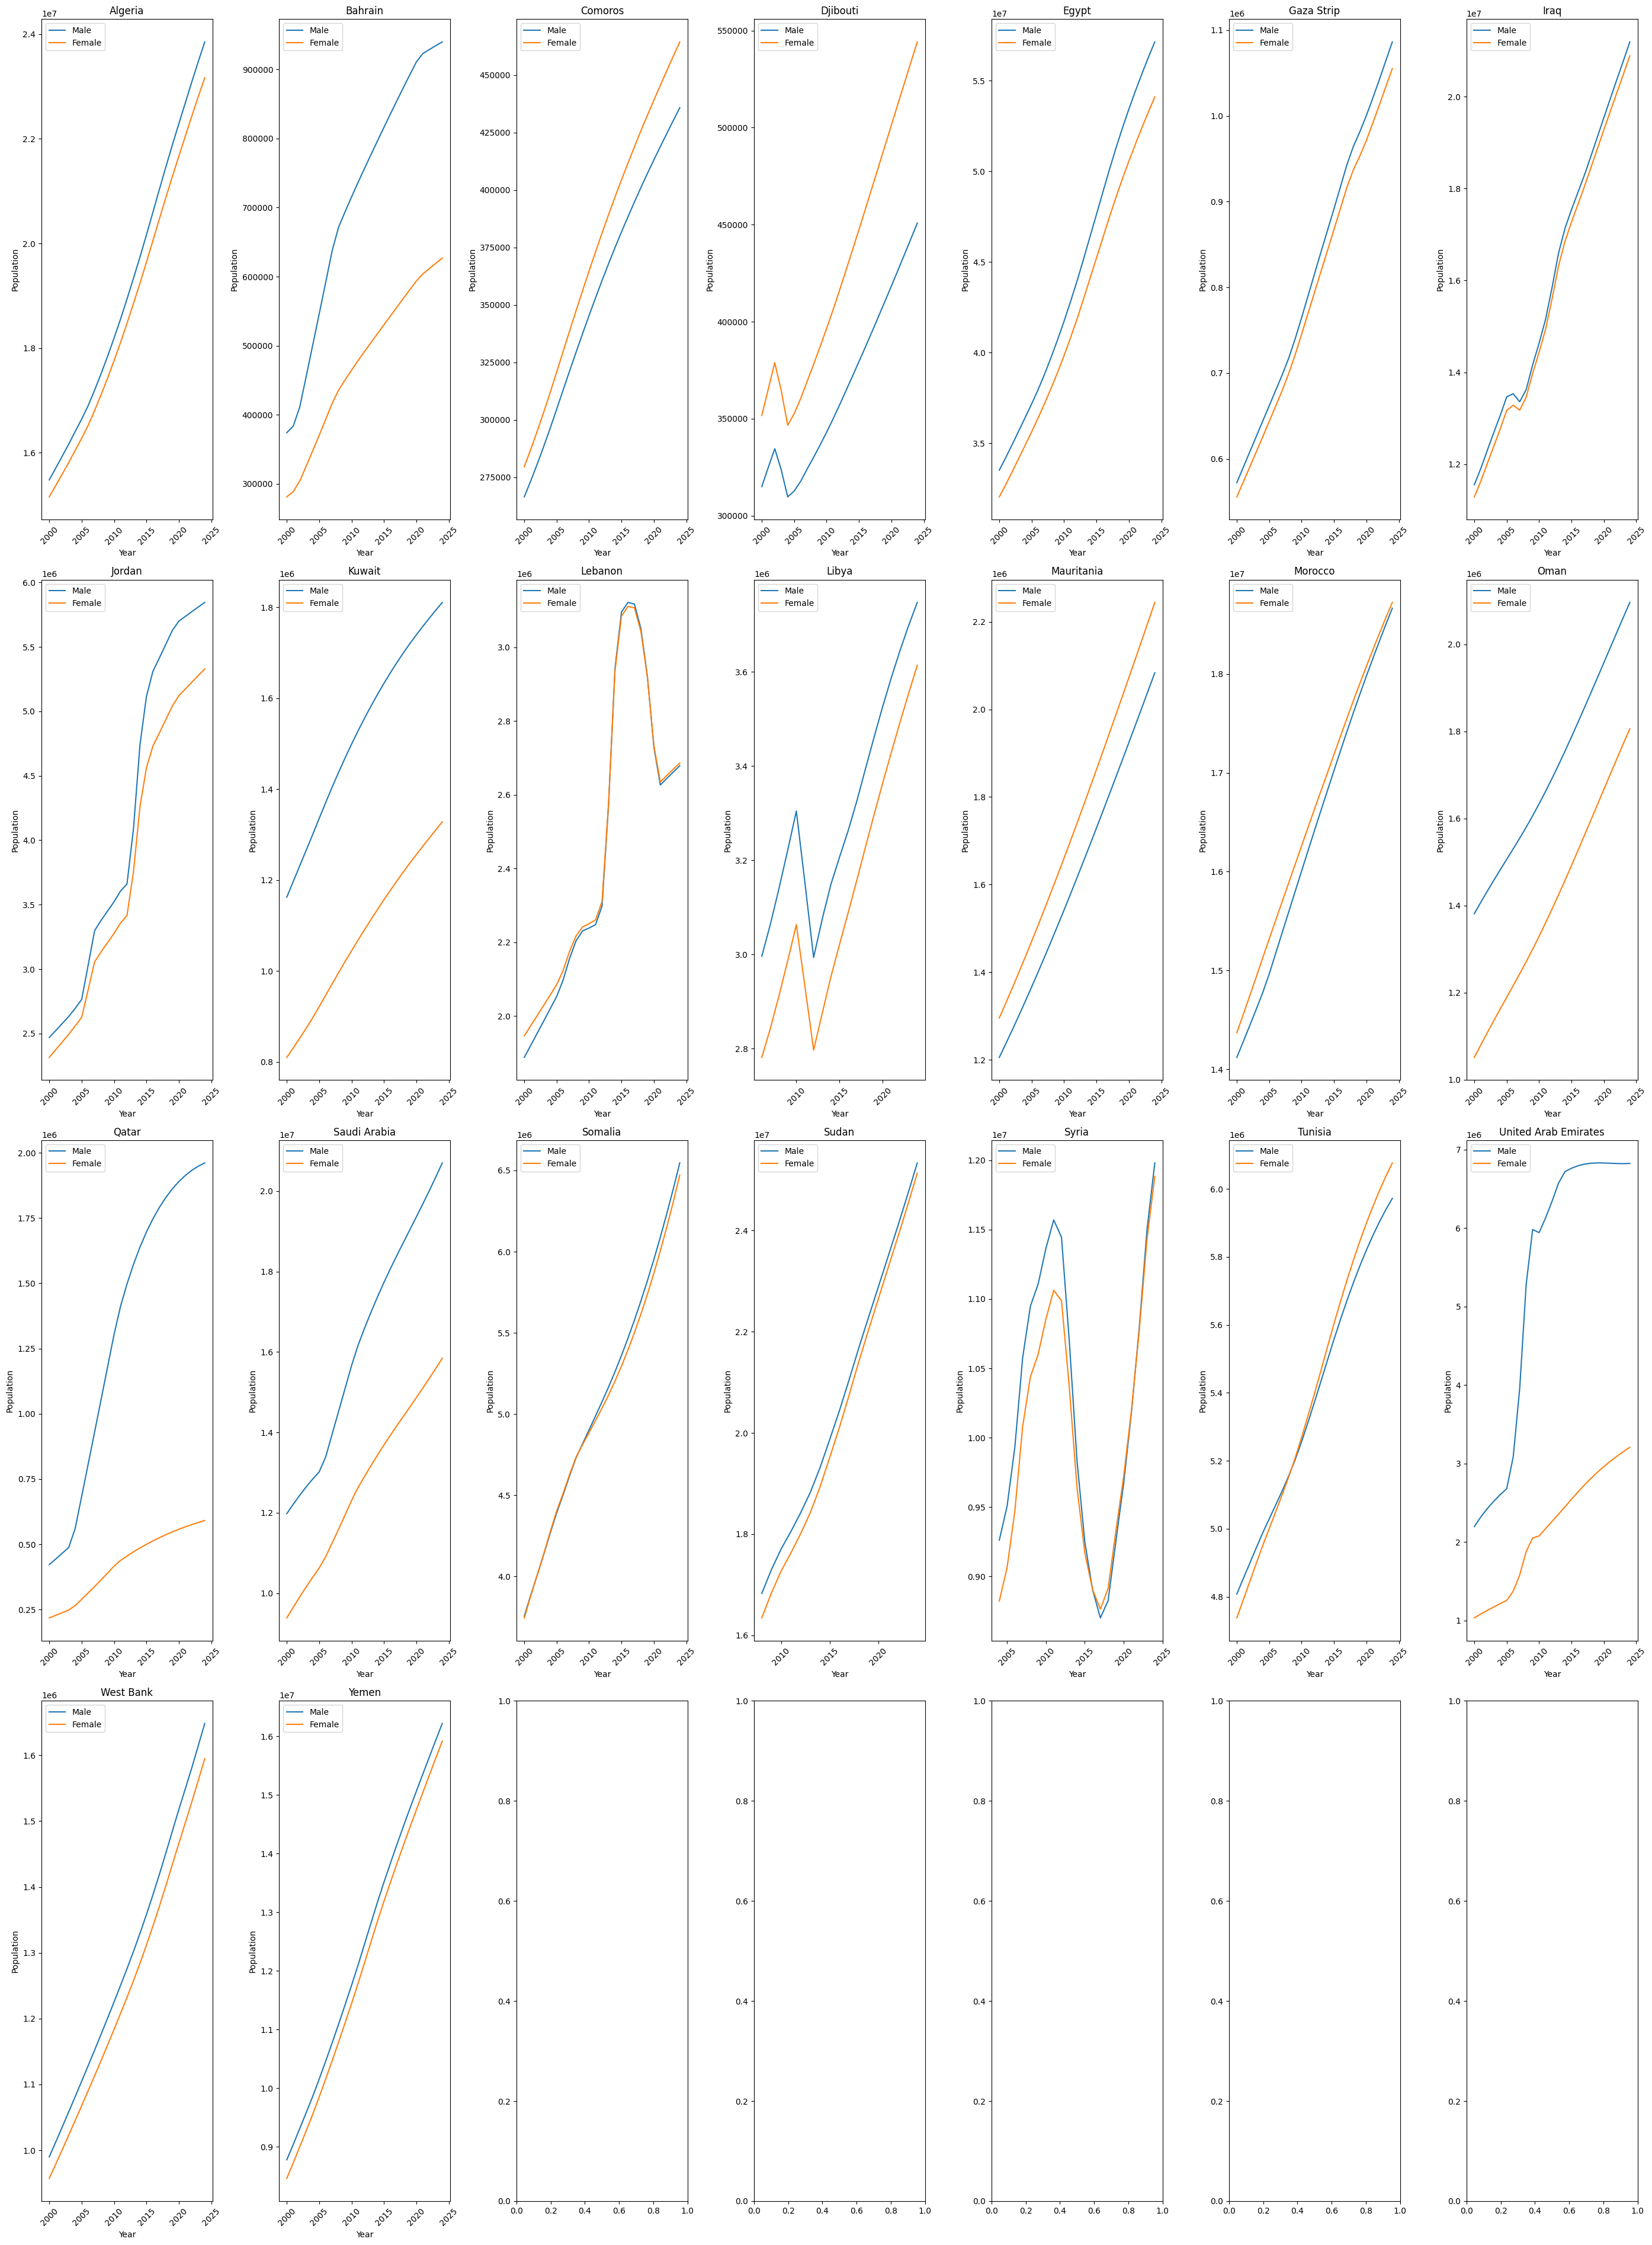

In [15]:
selected_data['Male Population'] = pd.to_numeric(selected_data['Male Population'], errors='coerce')
selected_data['Female Population'] = pd.to_numeric(selected_data['Female Population'], errors='coerce')

countries = selected_data['Name'].unique()
num_countries = len(countries)

fig, axs = plt.subplots(4, num_countries // 3, figsize=(28, 38))
axs = axs.flatten()

for i, country in enumerate(countries):
    sns.lineplot(x='Year', y='Male Population', data=selected_data[selected_data['Name'] == country], ax=axs[i], label = 'Male')
    sns.lineplot(x='Year', y='Female Population', data=selected_data[selected_data['Name'] == country], ax=axs[i], label = 'Female')
    axs[i].set_title(country)
    axs[i].set_xlabel('Year')
    axs[i].set_ylabel('Population')
    axs[i].set_xticklabels(axs[i].get_xticklabels(), rotation=45)

plt.tight_layout()
plt.show()


**7. Dispay Bahrain's Annual Growth Rate % over the years**

<function matplotlib.pyplot.show(close=None, block=None)>

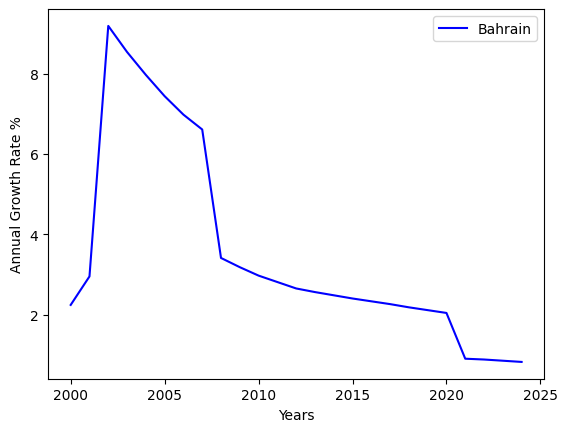

In [16]:
data_Bahrain.loc[:,'Annual Growth Rate %'] = pd.to_numeric(data_Bahrain['Annual Growth Rate %'], errors='coerce')
data_Bahrain.plot(x= 'Year', y = 'Annual Growth Rate %', linestyle = '-', color = 'b', label = 'Bahrain')
plt.title = 'Annual Growth Rate for Bahrain over the years'
plt.xlabel('Years')
plt.ylabel('Annual Growth Rate %')
plt.legend
plt.show

**9. Display Annual Growth Rate % for all the countries between the year of 2000 and 2024**

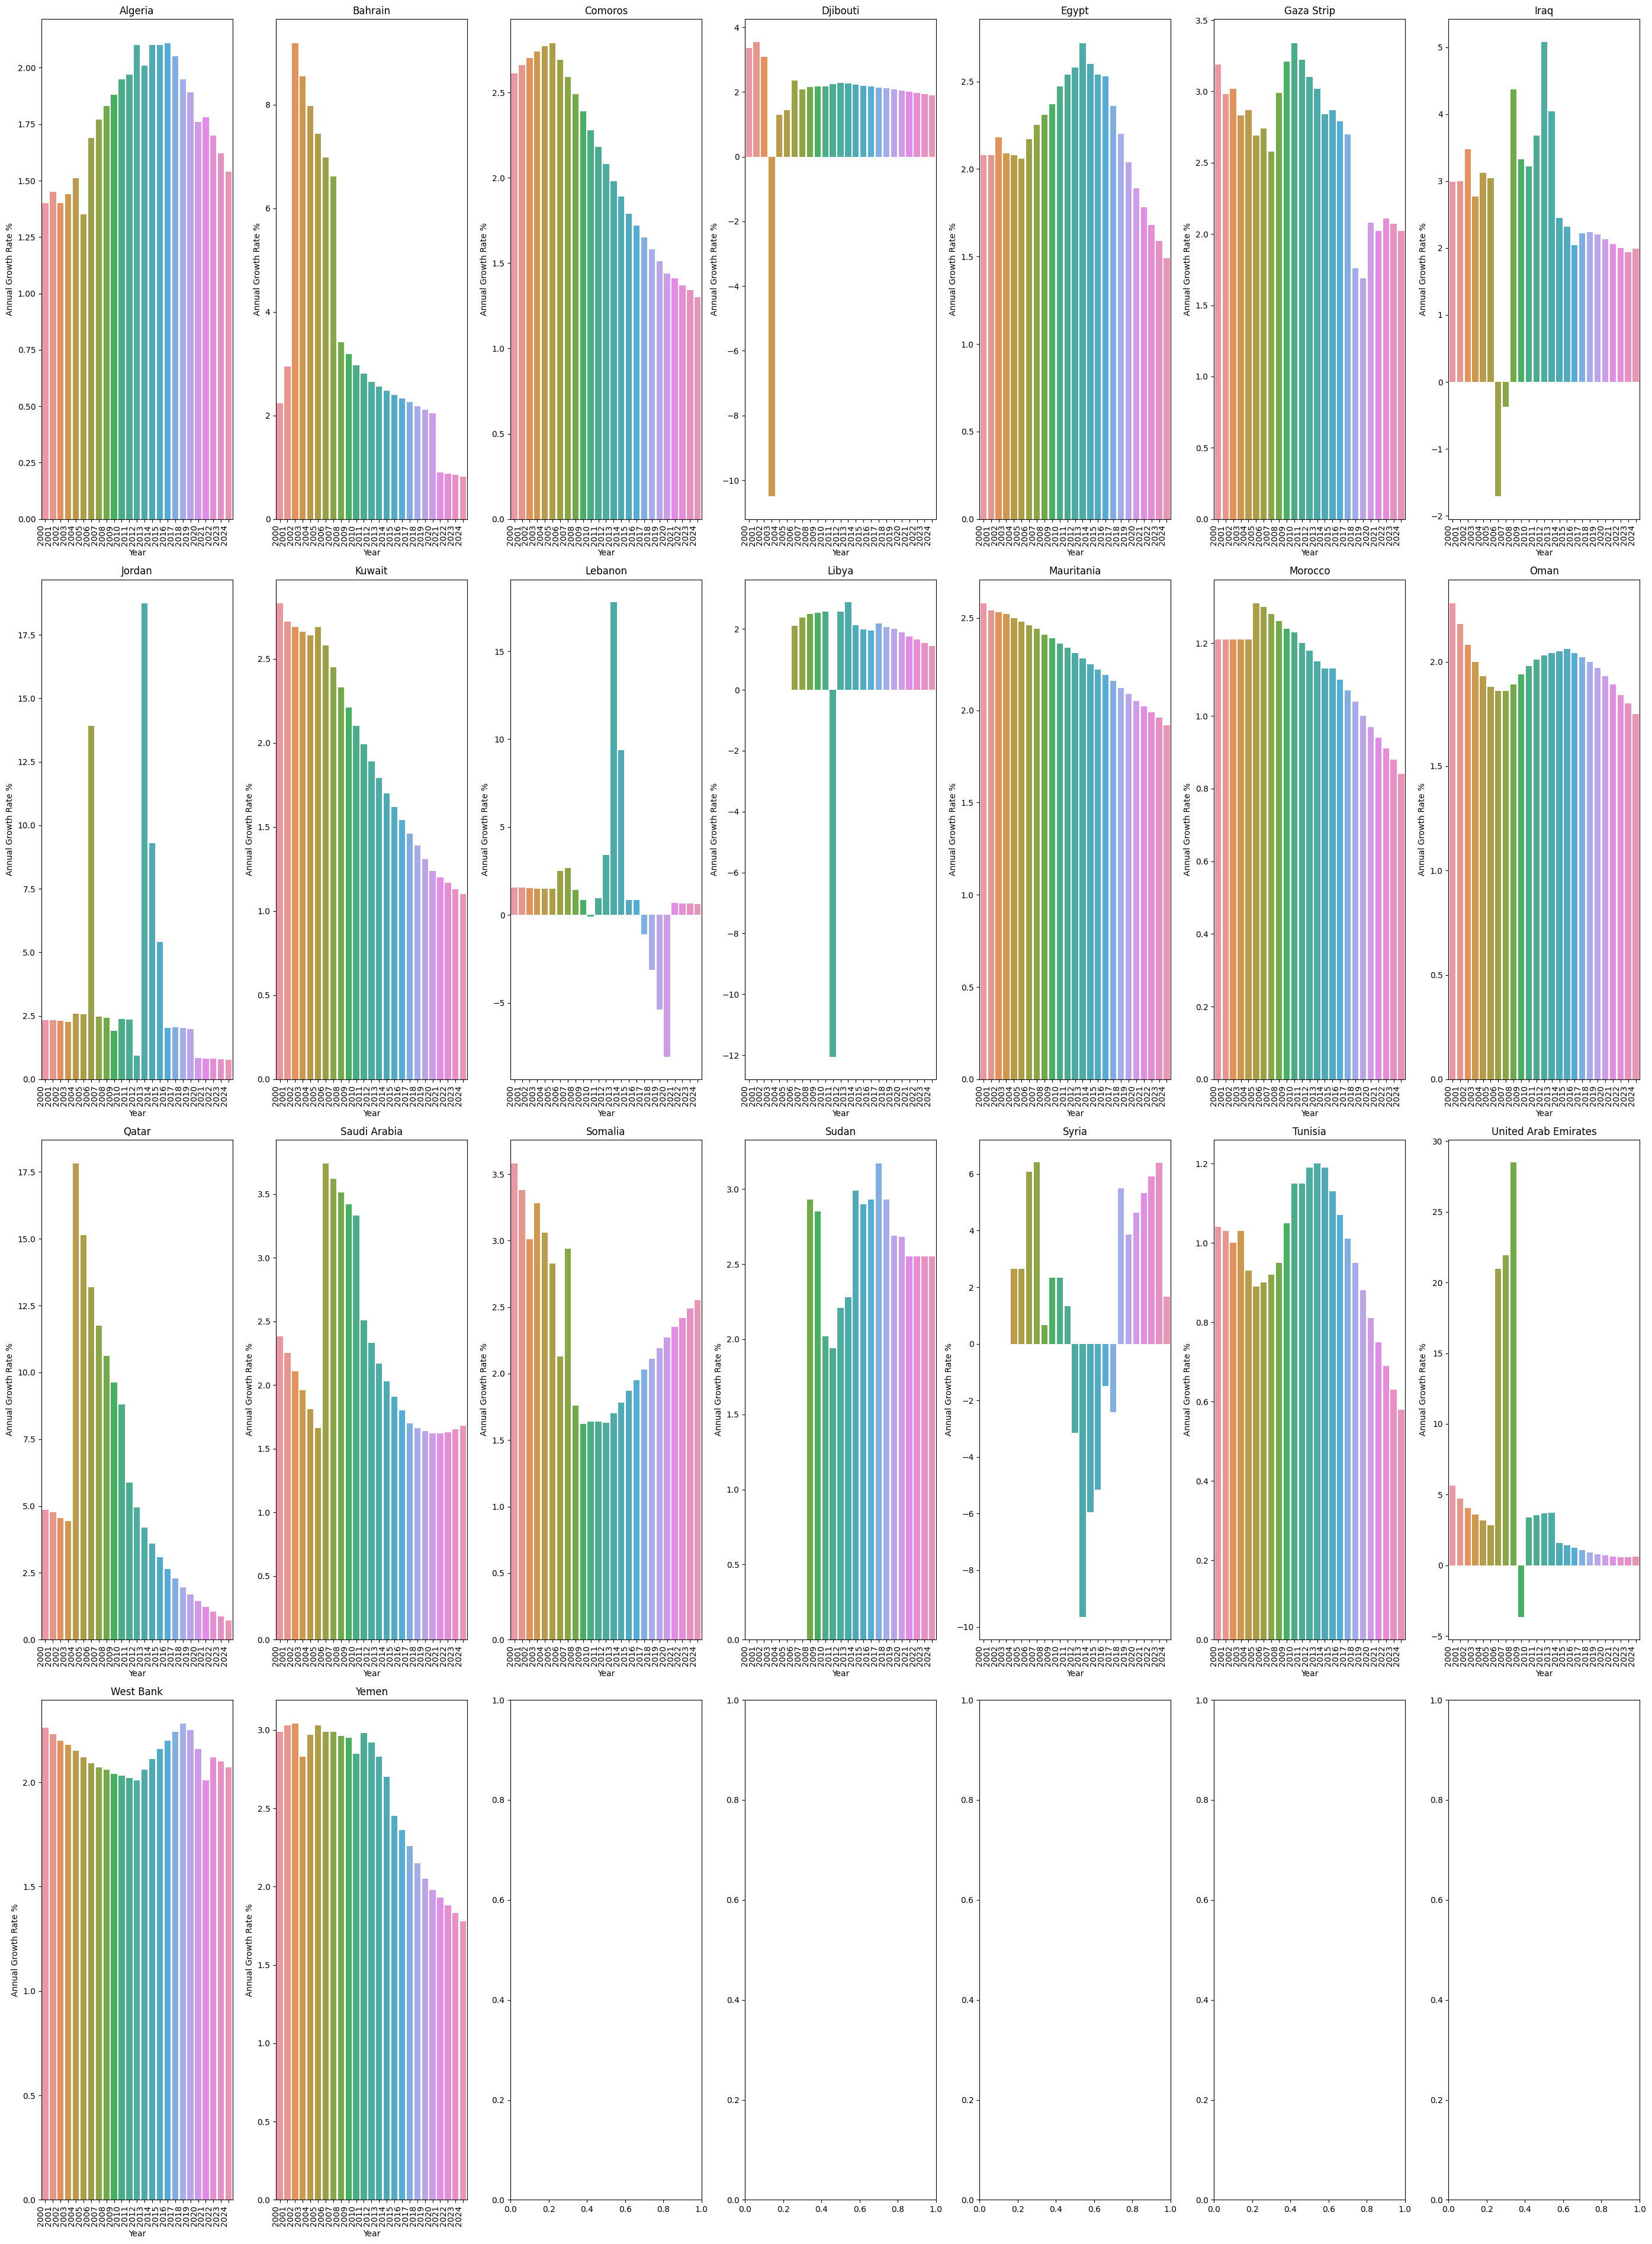

In [17]:
selected_data['Annual Growth Rate %'] = pd.to_numeric(selected_data['Annual Growth Rate %'], errors='coerce')
countries = selected_data['Name'].unique()
num_countries = len(countries)

fig, axs = plt.subplots(4, num_countries // 3, figsize=(28, 38) )
axs = axs.flatten()

for i, country in enumerate(countries):
    sns.barplot(x='Year', y='Annual Growth Rate %', data=selected_data[selected_data['Name'] == country], ax=axs[i])
    axs[i].set_title(country)
    axs[i].set_xlabel('Year')
    axs[i].set_ylabel('Annual Growth Rate %')
    axs[i].set_xticklabels(axs[i].get_xticklabels(), rotation=90, ha='right')

plt.subplots_adjust(hspace=0.5)
plt.tight_layout()
plt.show()


**10. Infant mortality rate of males and females per country**

/tmp/ipykernel_18/2507940080.py:16: UserWarning: FixedFormatter should only be used together with FixedLocator
  axs[i].set_xticklabels(axs[i].get_xticklabels(), rotation=90, ha='right')
/tmp/ipykernel_18/2507940080.py:16: UserWarning: FixedFormatter should only be used together with FixedLocator
  axs[i].set_xticklabels(axs[i].get_xticklabels(), rotation=90, ha='right')
/tmp/ipykernel_18/2507940080.py:16: UserWarning: FixedFormatter should only be used together with FixedLocator
  axs[i].set_xticklabels(axs[i].get_xticklabels(), rotation=90, ha='right')
/tmp/ipykernel_18/2507940080.py:16: UserWarning: FixedFormatter should only be used together with FixedLocator
  axs[i].set_xticklabels(axs[i].get_xticklabels(), rotation=90, ha='right')
/tmp/ipykernel_18/2507940080.py:16: UserWarning: FixedFormatter should only be used together with FixedLocator
  axs[i].set_xticklabels(axs[i].get_xticklabels(), rotation=90, ha='right')
/tmp/ipykernel_18/2507940080.py:16: UserWarning: FixedFormatter s

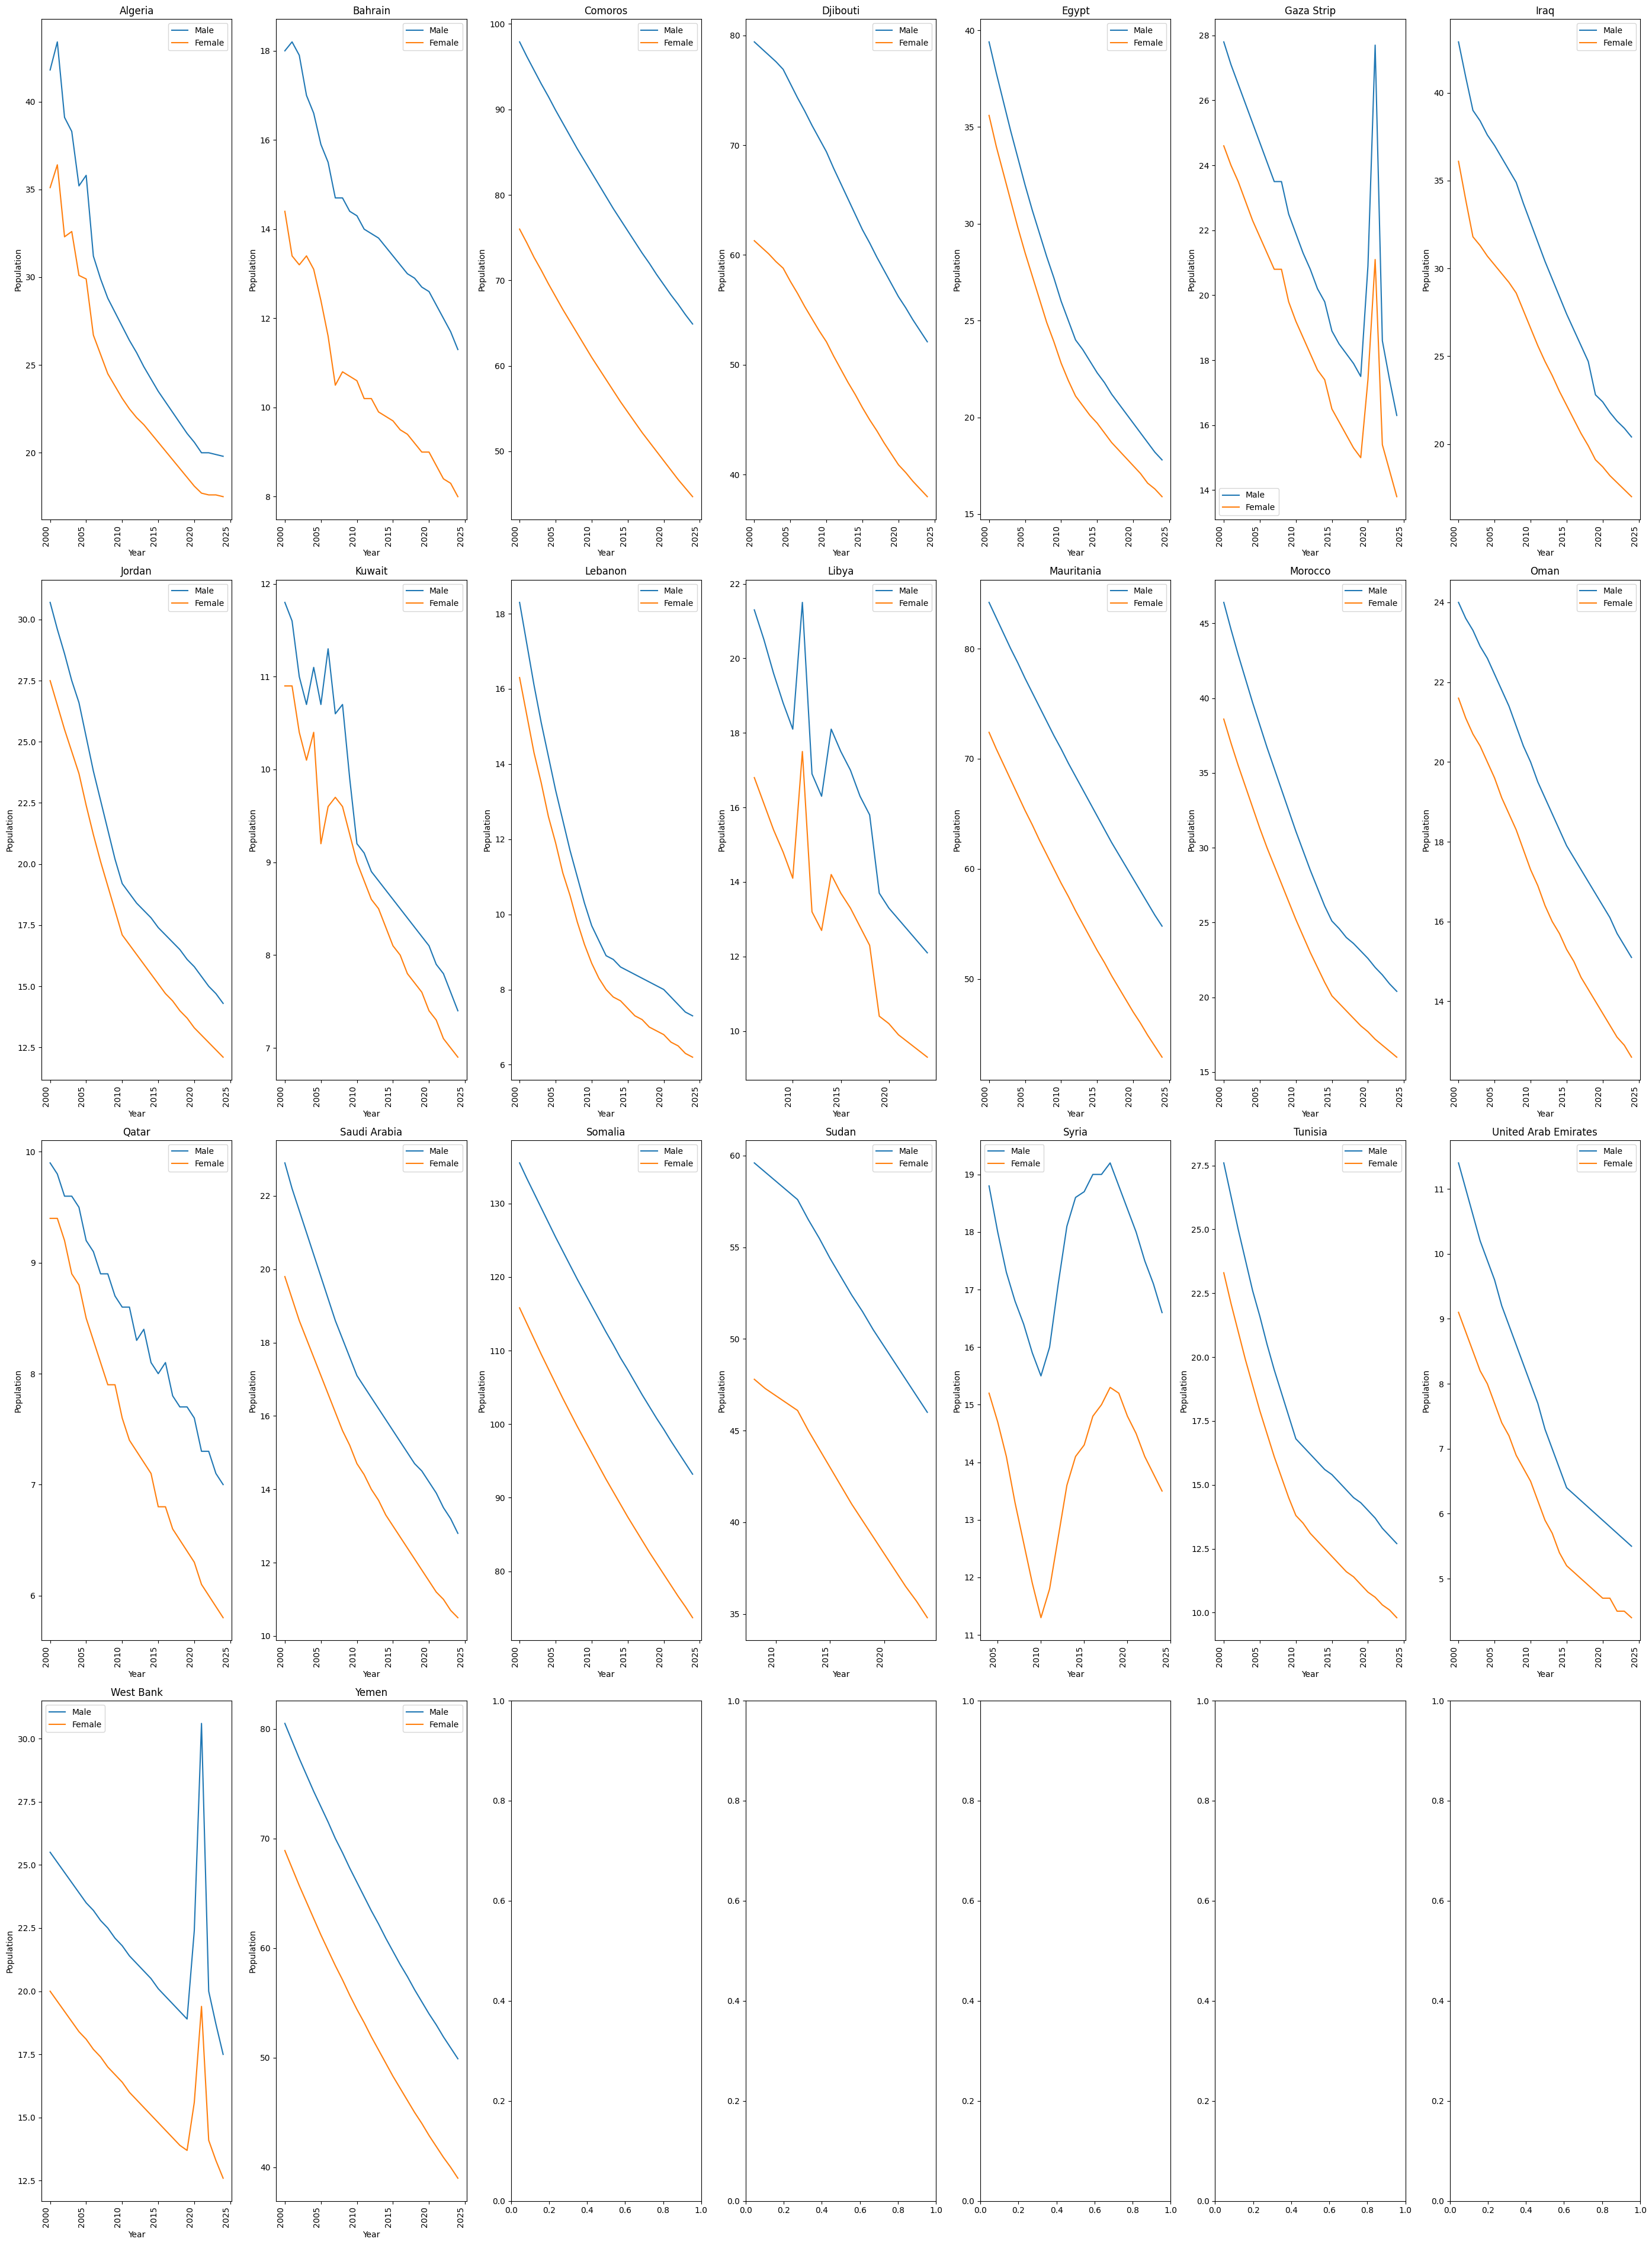

In [18]:
selected_data['Infant Mortality Rate, Males'] = pd.to_numeric(selected_data['Infant Mortality Rate, Males'], errors='coerce')
selected_data['Infant Mortality Rate, Females'] = pd.to_numeric(selected_data['Infant Mortality Rate, Females'], errors='coerce')

countries = selected_data['Name'].unique()
num_countries = len(countries)

fig, axs = plt.subplots(4, num_countries // 3, figsize=(28, 38))
axs = axs.flatten()

for i, country in enumerate(countries):
    sns.lineplot(x='Year', y='Infant Mortality Rate, Males', data=selected_data[selected_data['Name'] == country], ax=axs[i], label = 'Male')
    sns.lineplot(x='Year', y='Infant Mortality Rate, Females', data=selected_data[selected_data['Name'] == country], ax=axs[i], label = 'Female')
    axs[i].set_title(country)
    axs[i].set_xlabel('Year')
    axs[i].set_ylabel('Population')
    axs[i].set_xticklabels(axs[i].get_xticklabels(), rotation=90, ha='right')

plt.subplots_adjust(hspace=0.5)
plt.tight_layout()
plt.show()


**11.Population Density per Country**

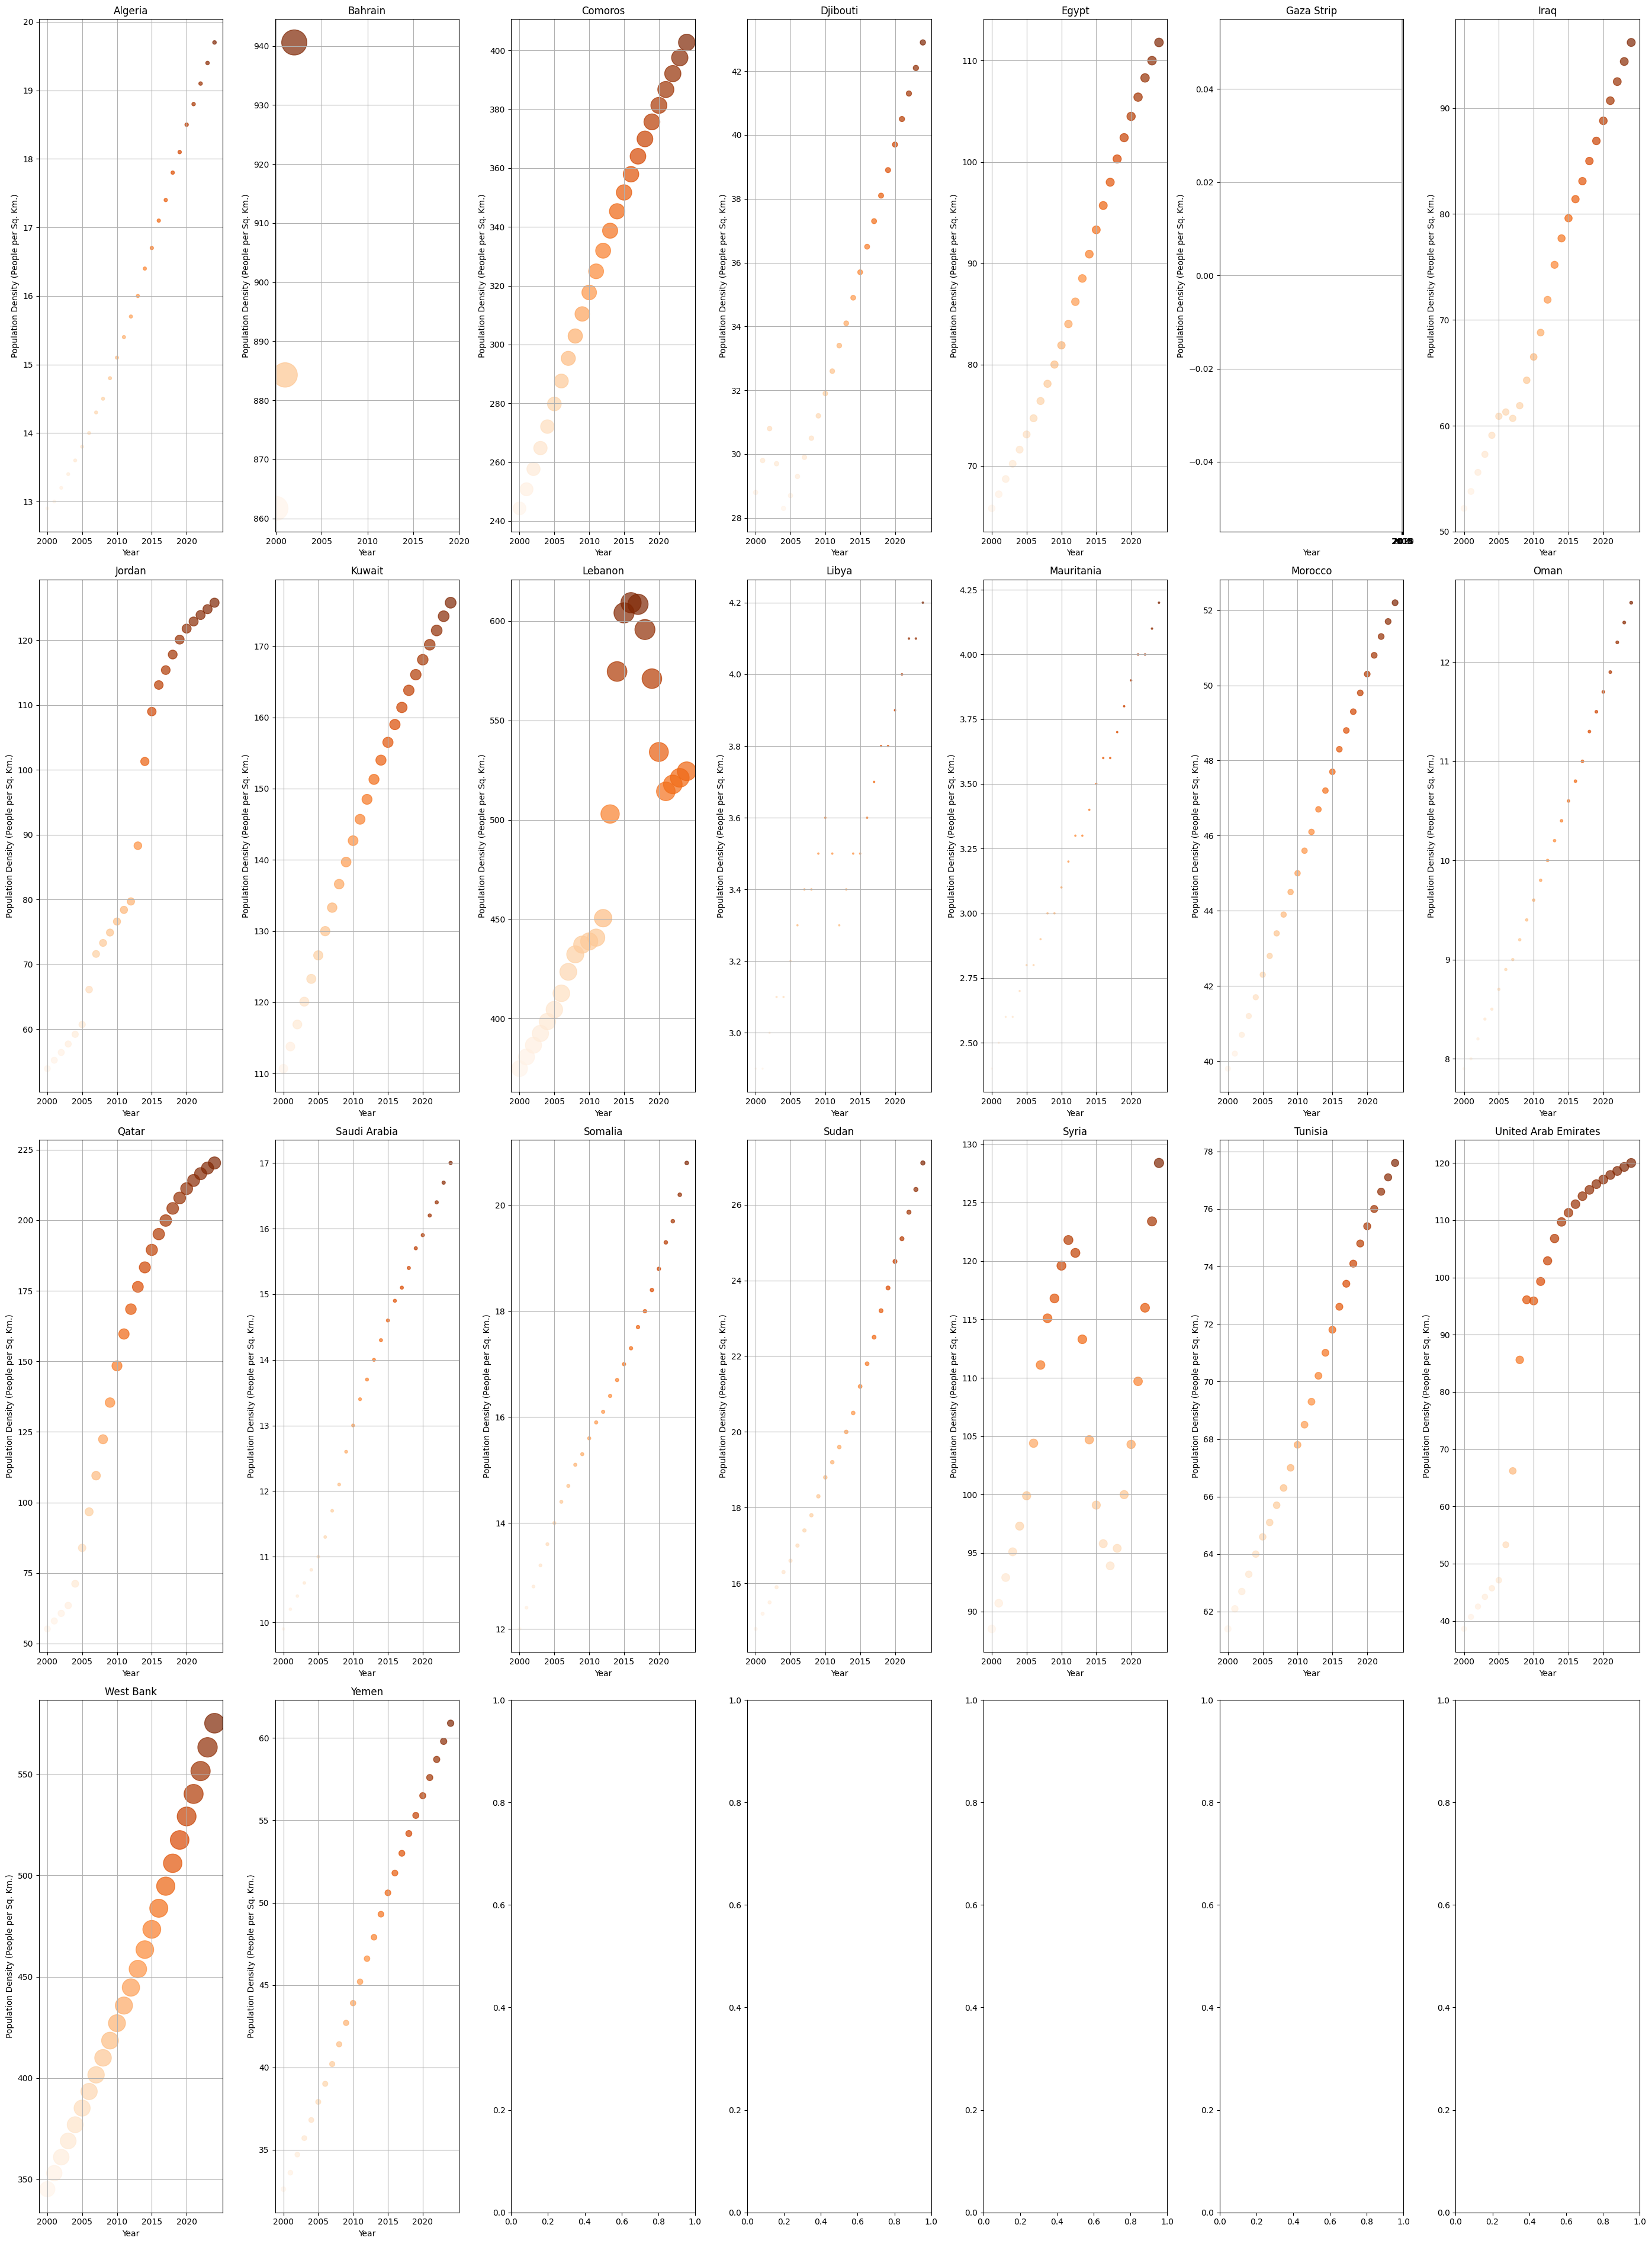

In [19]:
from matplotlib.colors import Normalize

selected_data['Population Density (People per Sq. Km.)'] = pd.to_numeric(selected_data['Population Density (People per Sq. Km.)'], errors='coerce')
countries = selected_data['Name'].unique()
num_countries = len(countries)

fig, axs = plt.subplots(4, num_countries // 3, figsize=(28, 38))
axs = axs.flatten()

for i, country in enumerate(countries):
    country_data = selected_data[selected_data['Name'] == country]
    bubble_size = country_data['Population Density (People per Sq. Km.)']
    
    selected_years = country_data['Year'].unique()[::5]

    norm = Normalize(vmin=min(bubble_size), vmax=max(bubble_size))
    axs[i].scatter(country_data['Year'], country_data['Population Density (People per Sq. Km.)'], s=bubble_size, alpha=0.7, c=bubble_size, cmap='Oranges', norm=norm)
    
    axs[i].set_title(country)
    axs[i].set_xlabel('Year')
    axs[i].set_ylabel('Population Density (People per Sq. Km.)')
    axs[i].set_xticks(selected_years)
    axs[i].grid(True)

plt.subplots_adjust(hspace=0.5)
plt.tight_layout()
plt.show()


**12. Gaza Strip Population Density ****

In [20]:
data_Gaza_Strip.loc[:,'Population Density (People per Sq. Km.)'] = pd.to_numeric(data_Gaza_Strip['Population Density (People per Sq. Km.)'].astype(str).str.replace(',', ''), errors='coerce')

data_Gaza_Strip.loc[:,'Year'] = pd.to_numeric(data_Gaza_Strip['Year'], errors='coerce')

fig = px.scatter(data_Gaza_Strip,
                 x='Year',
                 y='Population Density (People per Sq. Km.)',
                 title='Population Density of Gaza Strip Over the Years',
                 labels={'Population Density (People per Sq. Km.)': 'Population Density'},
                 hover_name='Name',
                 size_max=50,
                 color='Population Density (People per Sq. Km.)',
                 color_continuous_scale='reds',
                 opacity=0.7,  
                 template='plotly_white' 
                 )
fig.update_layout(showlegend=False)


fig.show()
